# IMPORT THE DATA 

Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [326]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\seanr\Desktop\Projects\unsupervised machine learning\OnlineRetail.csv", sep=",", encoding="ISO-8859-1", header=0)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [327]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Goal : Market segmentation 

We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

Recency, frequency, monetary value is a marketing analysis tool used to identify a company’s or an organization’s best customers by using certain measures. The RFM model is based on three quantitative factors:

* Recency: How recently a customer has made a purchase

* Frequency: How often a customer makes a purchase

* Monetary Value: How much money a customer spends on purchases

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [329]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [330]:
df=df.dropna()

In [331]:
df['CustomerID'] = df['CustomerID'].astype(str)

# FEATURE ENGINEERING

We are going to analysis the Customers based on below 3 factors:

R (Recency): Number of days since last purchase
F (Frequency): Number of tracsactions
M (Monetary): Total amount of transactions (revenue contributed)

This is called the RFM model for market segmentation

In [332]:

# New Attribute : Monetary


df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [333]:
# New Attribute : Frequency

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [334]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [335]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [336]:
# Compute the maximum date to know the last transaction date

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [337]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [338]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [339]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [340]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm1=rfm.iloc[:,:]
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


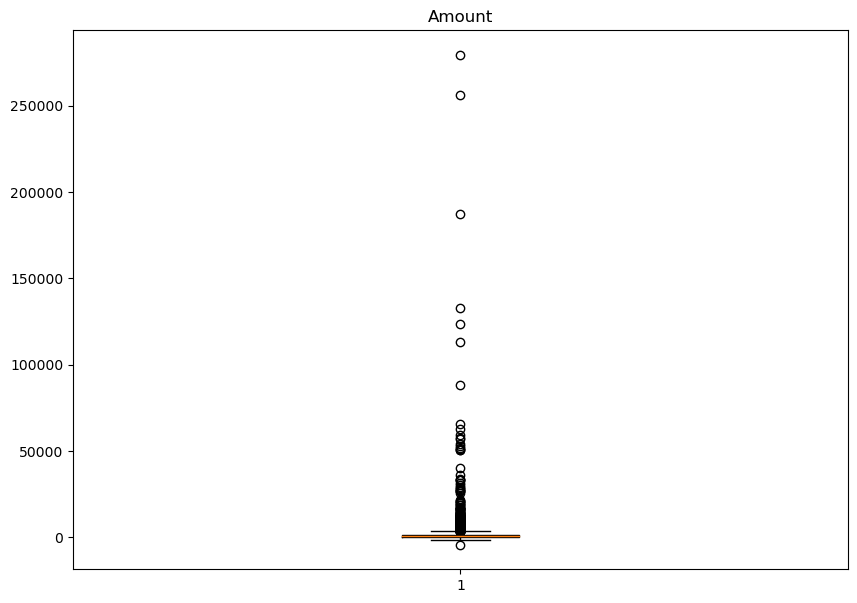

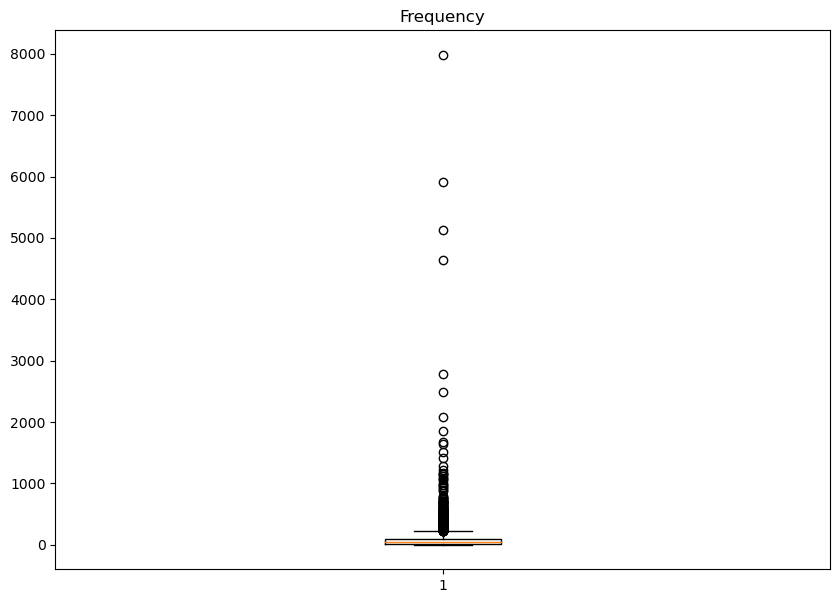

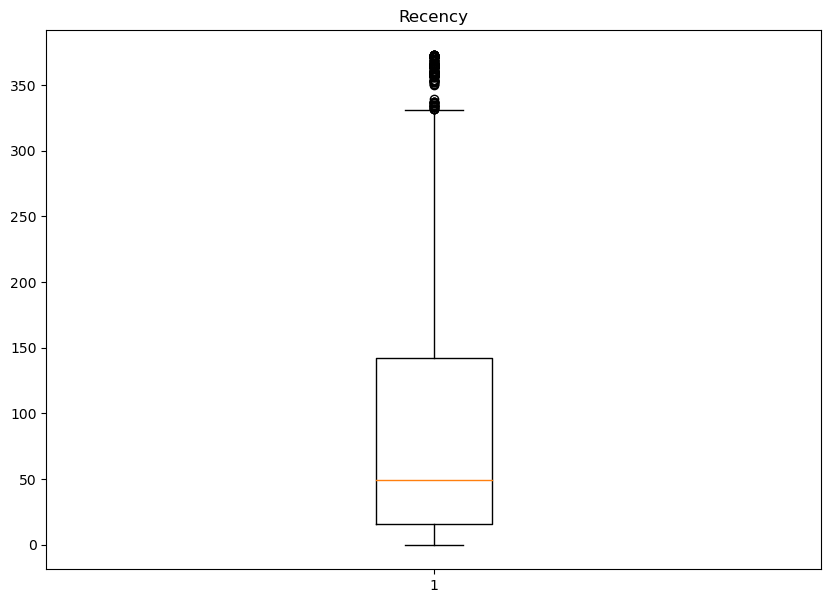

In [341]:
#CHECKING FOR OUTLIERS
for i in ["Amount","Frequency","Recency"]:
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(rfm[i])
    plt.title(i)
    plt.show()

In [342]:
#REMOVING OUTLIERS

for i in ["Amount","Frequency","Recency"]:
    q1=rfm[i].quantile(0.25)
    q3=rfm[i].quantile(0.75)

    iqr=q3-q1

    upper=q3+1.5*iqr
    lower=q1-1.5*iqr


    rfm=rfm[rfm[i]<=upper]
    rfm=rfm[rfm[i]>=lower]



In [343]:
rfm.shape

(3697, 4)

In [344]:
# Rescaling the attributes
from sklearn.preprocessing import StandardScaler

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3697, 3)

C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, 'WCSS')

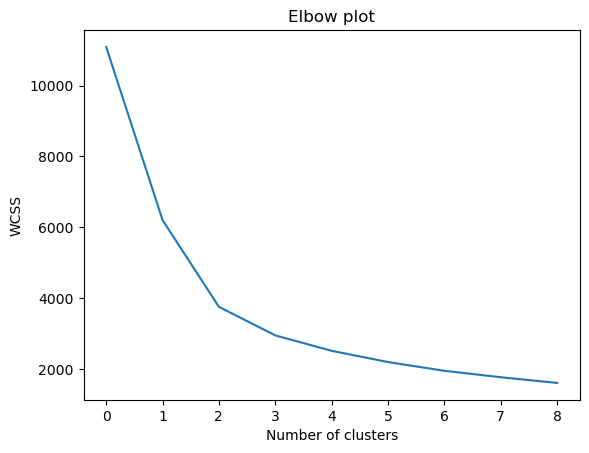

In [345]:
from sklearn.cluster import KMeans


wcss=[]                   #Within cluster sum of squares

for i in range(1,10):
    km=KMeans(n_clusters=i,init="k-means++")    # k means ++ initializes centroids as far as possible for each other 
    km.fit(rfm_df_scaled)
    wcss.append(km.inertia_)
    
plt.plot(wcss)  
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [346]:
# Manually tried values 2,3,4,5 and found 3 to be the optimal value, can also be done with for loop

from sklearn.metrics import silhouette_score
import numpy as np

km = KMeans(n_clusters=3)
labels = km.fit_predict(rfm_df_scaled)                 # we can do model.fit_predict or model. fit and then model.labels_ to get labels
avg_score=silhouette_score(rfm_df_scaled,labels)
avg_score

C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4397845788699801

In [347]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,init="k-means++",max_iter=50)
km.fit(rfm_df_scaled)

C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [348]:
km_cluster=km.labels_

In [349]:
rfm["km_cluster"]=km_cluster

<Axes: xlabel='km_cluster', ylabel='Amount'>

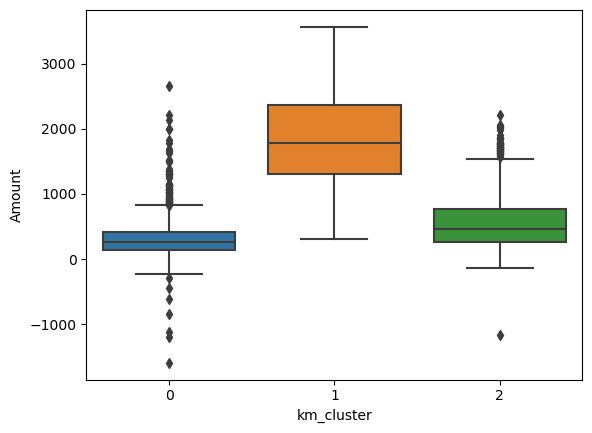

In [350]:
import seaborn as sns

sns.boxplot(x="km_cluster", y='Amount', data=rfm)

<Axes: xlabel='km_cluster', ylabel='Frequency'>

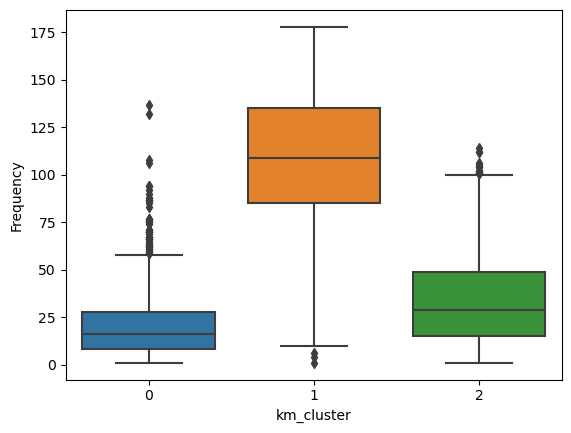

In [351]:
sns.boxplot(x='km_cluster', y='Frequency', data=rfm)

<Axes: xlabel='km_cluster', ylabel='Recency'>

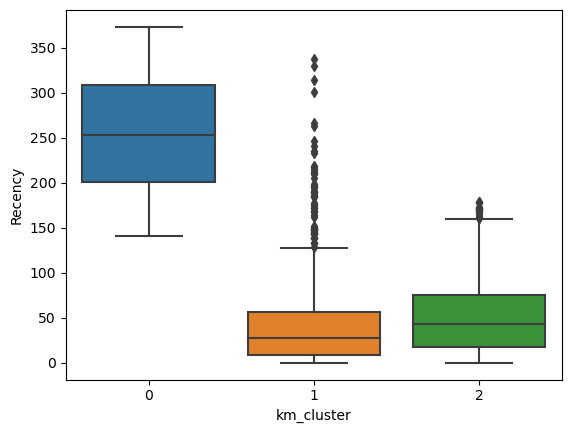

In [352]:
sns.boxplot(x='km_cluster', y='Recency', data=rfm)

# ANALYSIS OF OUR CLUSTERING :


The following clusters of customers can be identified by performing k means clustering:

CLUSTER 1: GOLD CUSTOMERS:

These are our most valuable customers.They spend more ,buy more frequently,and your most recent customers as well.These are the customers the business should focus on!

CLUSTER 2: POTENTIAL CUSTOMERS: These are the customers that spend moderately ,buy items sometimes and are not too frequent

CLUSTER 3: ONE TIME CUSTOMERS: These are the customers who do not come often , they spend minimal,are not frequent and have not purchased items lately



# HIERARCHICAL CLUSTERING 

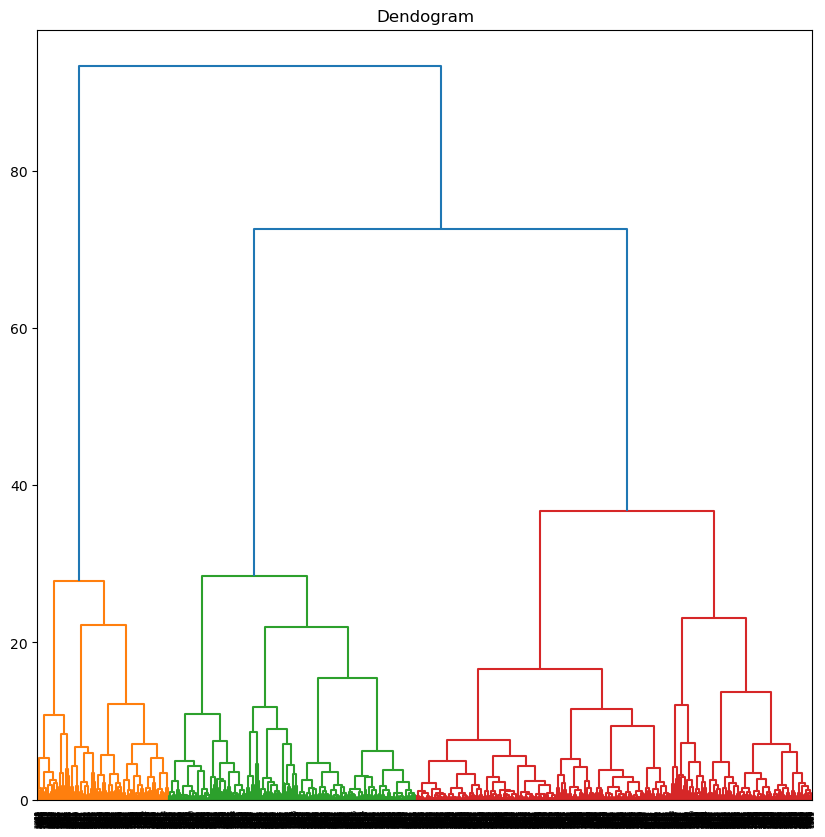

In [166]:
# HIERARCHICAL CLUSTERING


import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,10))

dendrogram=sch.dendrogram(sch.linkage(rfm_df_scaled,method="ward"))
plt.title("Dendogram")


plt.show()

In [ ]:
#NOTE: WE WILL USE AGGLOMERATIVE HIERARCHICAL CLUSTERING WHICH IS BOTTOM UP APPROACH OF HIERARCHICAL CLUSTERING 

PARAMETERS:

LINKAGE: HOW DISTANCE IS CALCULATED BETWEEN CLUSTERS

        -single linkage: shortest distance between 2 points in each cluster
        -complete linakge: longest distance between 2 poimts in each cluster
        -average linkage
        -ward : ward minimizes the variance of the clusters being merged.



In [65]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")   # 3 clusters give us best silhouette score

labels=model.fit_predict(rfm_df_scaled)

silhouette_score(rfm_df_scaled,labels)


C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.577695546877585

In [167]:
rfm["hc_cluster"]=labels

<Axes: xlabel='hc_cluster', ylabel='Amount'>

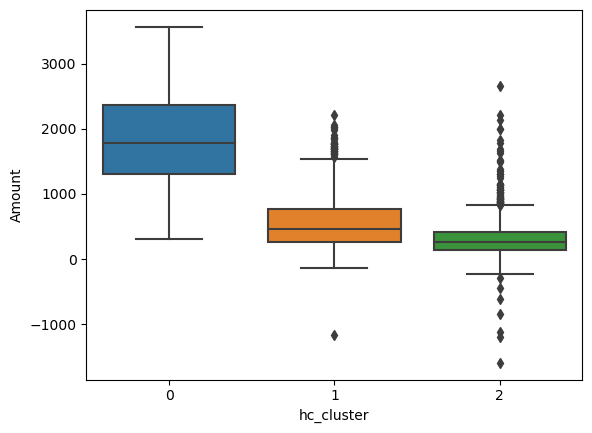

In [168]:
sns.boxplot(x="hc_cluster", y='Amount', data=rfm)

<Axes: xlabel='hc_cluster', ylabel='Frequency'>

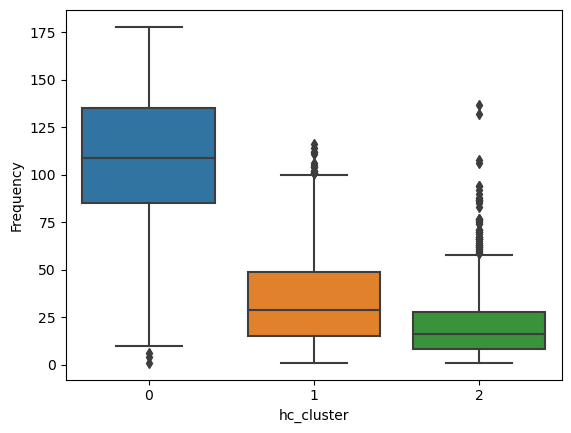

In [169]:
sns.boxplot(x='hc_cluster', y='Frequency', data=rfm)

<Axes: xlabel='hc_cluster', ylabel='Recency'>

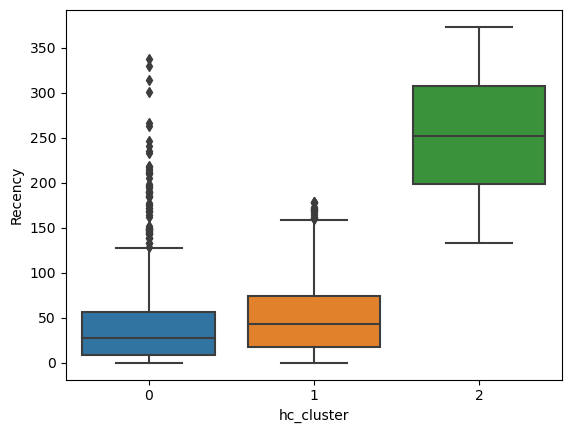

In [170]:
sns.boxplot(x='hc_cluster', y='Recency', data=rfm)

# ANALYSIS OF OUR CLUSTERING

The following clusters of customers can be identified by performing hierarchical clustering :

CLUSTER 0: GOLD CUSTOMERS:

These are our most valuable customers.They spend more ,buy more frequently,and your most recent customers as well.These are the customers the business should focus on!

CLUSTER 1: POTENTIAL CUSTOMERS: These are the customers that spend moderately ,buy items sometimes and are not too frequent

CLUSTER 2: ONE TIME CUSTOMERS: These are the customers who do not come often , they spend minimal,are not frequent and have not purchased items lately



# DBSCAN

In [ ]:
# DBSCAN WORKS WELL WITH OUTLIERS, HENCE WE DO NOT NEED TO DELETED OUTLIERS
# WE TAKE THE DATASET BEFORE REMOVING OUTLIERS AND SCALE IT 

In [251]:
# Rescaling the attributes
from sklearn.preprocessing import StandardScaler

rfm_df = rfm1[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4372, 3)

In [285]:
# DBSCAN

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(rfm_df_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_df_scaled)    # we thus get the distances of each point with each of its n enighbours

In [286]:
# however we want only the distance of the each point from its nth neighbour where n = min sample

furthest_distances=distances[:,-1]
furthest_distances

array([0.02517216, 0.06507905, 0.06953061, ..., 0.01800149, 0.39936386,
       0.05832446])

In [287]:
furthest_distances=np.sort(furthest_distances, axis=0)
  


(0.0, 2.0)

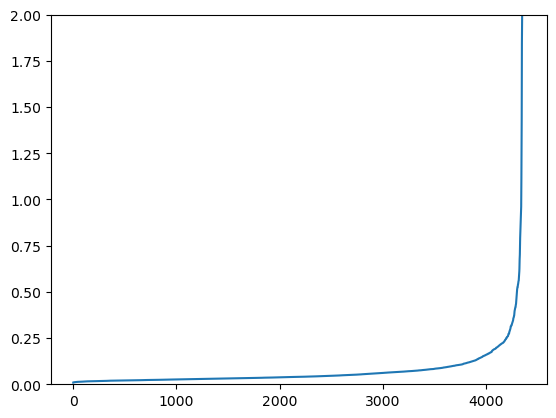

In [288]:
#LETS ZOOM IN FURTHER SO WE CAN FIND THE ELBOW POINT


plt.plot(furthest_distances)
plt.ylim(0,2)

In [289]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    model=DBSCAN(eps=i,min_samples=6)
    labels=model.fit_predict(rfm_df_scaled)
    print(i,": ",silhouette_score(rfm_df_scaled,labels))



0.2 :  0.37792799585246045
0.3 :  0.4204294873077375
0.4 :  0.6472595513985347
0.5 :  0.715056879584612
0.6 :  0.8611470195776914
0.7 :  0.6598506018243371
0.8 :  0.8856462888240534
0.9 :  0.8907981428933822
1 :  0.896643149453738


In [362]:
#NOTE : INCREASING THE EPSILON WILL CREATE LESS CLUSTERS AND INCREASING MINIMUM NUMBER OF SAMPLES WILL DECREASE THE NUMBER OF CLUSTERS

In [369]:
model=DBSCAN(eps=0.3,min_samples=8)

model.fit(rfm_df_scaled)

labels=model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [370]:
rfm["dbscan_cluster"]=labels

In [371]:
rfm["dbscan_cluster"].value_counts()

 0    3338
-1     348
 1      11
Name: dbscan_cluster, dtype: int64

# DBSCAN ANALYSIS 

DBSCAN seems to be performing poorly as it puts majority of our data in a single cluster even after tweaking with several candidate values for epsilon and min_samples.

